In [3]:
from dataset import Dataset
dataset = Dataset()
dataset.load_task_datasets(*['SIMLEX999','SIMVERB3000-test','SIMVERB500-dev'])
dataset.load_words()
dataset.load_embeddings()

In [ ]:
lex_edges = set(map(frozenset,dataset.tasks['SIMLEX999']['X']))

In [5]:
print('lex: ',len(lex_edges))

lex:  998


In [6]:
from word_sim_task.config import ori_thesauri

In [7]:
ant_edges = set()
with open(ori_thesauri['ant_fname'], 'r') as f_ant:
    for line in f_ant:
        word_pair = line.split()
        word_pair = frozenset(word[3:] for word in word_pair)  # remove the 'en-' prefix
        ant_edges.add(word_pair)

In [8]:
print('thes syn: ',len(ant_edges))

thes syn:  1988


In [11]:
ant_lex_e = lex_edges & ant_edges

In [13]:
print('ant lex edges: ',len(ant_lex_e))

ant lex edges:  87


In [14]:
ant_lex_p,ant_lex_p_y = [],[]
for p,y in zip(dataset.tasks['SIMLEX999']['X'],dataset.tasks['SIMLEX999']['y']):
    if frozenset(p) in ant_lex_e:
        ant_lex_p.append(tuple(p))
        ant_lex_p_y.append(y)

In [15]:
print('number of syn lex pairs: ',len(ant_lex_p))

number of syn lex pairs:  87


In [16]:
len(ant_lex_p) / len(dataset.tasks['SIMLEX999']['X'])

0.08708708708708708

In [17]:
import seaborn as sns

In [18]:
import numpy as np

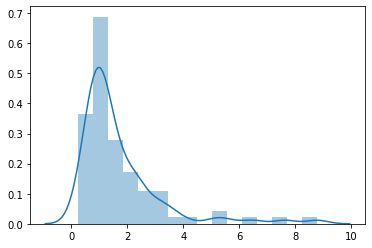

In [19]:
sns.distplot(ant_lex_p_y);

In [20]:
print('number of bad thes syn pairs: ',len(list(filter(lambda x:x<3,ant_lex_p_y))))

number of bad thes syn pairs:  76
